In [26]:
!python --version

Python 3.12.4


In [1]:
import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [28]:
img = cv2.imread("train_images/0abf0c485f66.png", cv2.IMREAD_COLOR)

In [29]:
cv2.imshow('Image',img)
cv2.waitKey(0)

-1

In [30]:
height, width, channels = img.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")

Width: 2048, Height: 1536, Channels: 3


In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [32]:
train_directory = os.getenv("TRAIN_IMAGE_PATH")
test_directory = os.getenv("TEST_IMAGE_PATH")

In [33]:

all_files = os.listdir(train_directory)


image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif")


train_image_count = 0
for file in all_files:
    if file.lower().endswith(image_extensions):
        train_image_count += 1
        
print("Train Image Count : ",train_image_count)


Train Image Count :  3662


In [34]:

all_files = os.listdir(test_directory)


image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif")


test_image_count = 0
for file in all_files:
    if file.lower().endswith(image_extensions):
        test_image_count += 1
        
print("Test Image Count : ",test_image_count)


Test Image Count :  1928


In [35]:
image_type_count = {'JPG': 0, 'JPEG': 0, 'PNG': 0}

def count_images(directory):
    all_files = os.listdir(directory)
    for file in all_files:
        file_lower = file.lower()
        if file_lower.endswith('.jpg'):
            image_type_count['JPG'] += 1
        elif file_lower.endswith('.jpeg'):
            image_type_count['JPEG'] += 1
        elif file_lower.endswith('.png'):
            image_type_count['PNG'] += 1


count_images(train_directory)
count_images(test_directory)


print("Image Type Count:", image_type_count)


Image Type Count: {'JPG': 0, 'JPEG': 0, 'PNG': 5590}


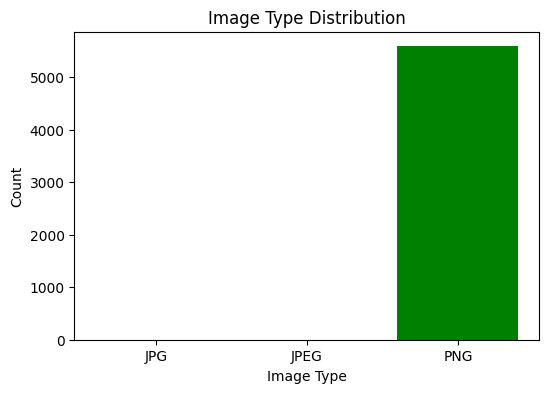

In [36]:
plt.figure(figsize=(6, 4))
plt.bar(image_type_count.keys(), image_type_count.values(), color=['blue', 'orange', 'green'])


plt.xlabel("Image Type")
plt.ylabel("Count")
plt.title("Image Type Distribution")
plt.show()

In [38]:
def calculate_width(image_directory):
    image_widths = {}
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        if img is not None:
            image_widths[image_file] = img.shape[1]  # Width of image

    return image_widths


train_widths = calculate_width(train_directory)
test_widths = calculate_width(test_directory)


all_widths = {**train_widths, **test_widths}
sorted_files = sorted(all_widths, key=all_widths.get)  
sorted_widths = [all_widths[file] for file in sorted_files]



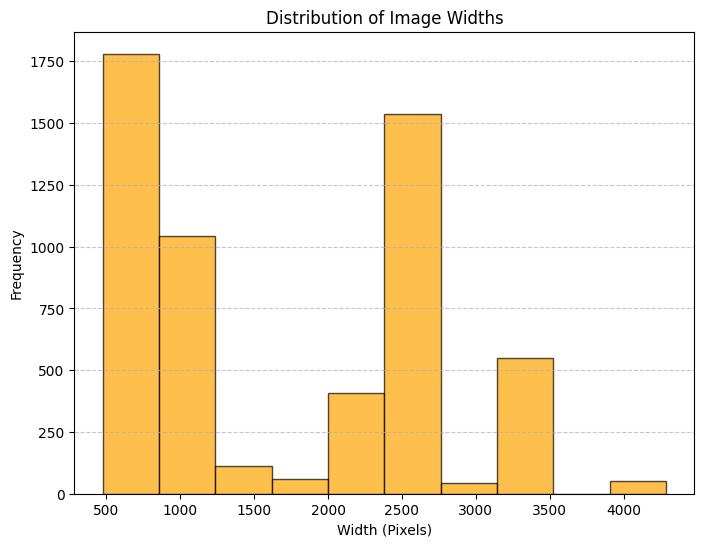

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sorted_widths, bins=10, color='orange', edgecolor='black', alpha=0.7)

plt.xlabel("Width (Pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [ ]:
def calculate_height(image_directory):
    image_height = {}
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        if img is not None:
            image_height[image_file] = img.shape[0]  

    return image_height


train_heights = calculate_height(train_directory)
test_heights = calculate_height(test_directory)


all_heights = {**train_heights, **test_heights}
sorted_files = sorted(all_heights, key=all_heights.get)  
sorted_height = [all_heights[file] for file in sorted_files]



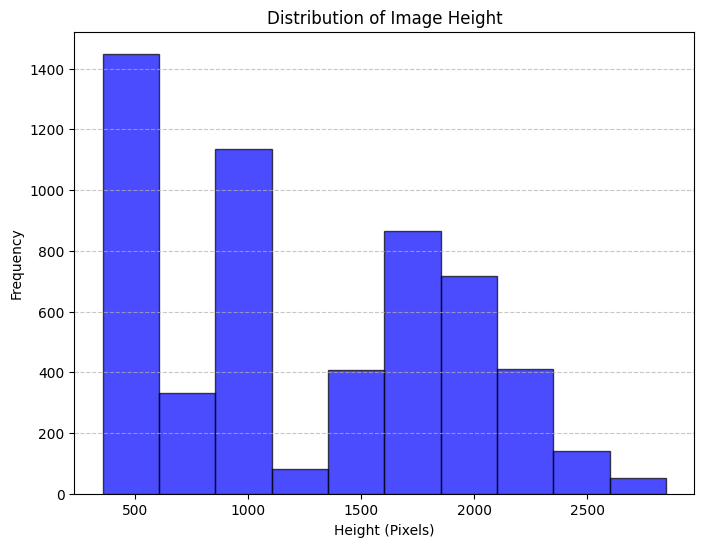

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sorted_height, bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel("Height (Pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Height")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [ ]:
def count_channel_intensity(image_directory):
    total_red, total_green, total_blue = 0, 0, 0
    image_count = 0
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            total_red += np.sum(img[:, :, 0])  
            total_green += np.sum(img[:, :, 1])  
            total_blue += np.sum(img[:, :, 2])  
            
            image_count += 1

    return total_red, total_green, total_blue, image_count



total_red_train, total_green_train, total_blue_train, image_count_train = count_channel_intensity(train_directory)
total_red_test, total_green_test, total_blue_test, image_count_test = count_channel_intensity(test_directory)


total_red = total_red_train + total_red_test
total_green = total_green_train + total_green_test
total_blue = total_blue_train + total_blue_test
image_count = image_count_train + image_count_test




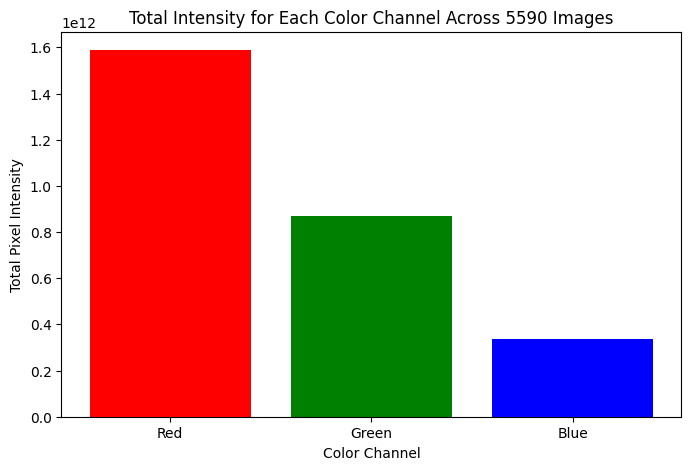

In [ ]:
colors = ["red", "green", "blue"]
totals = [total_red, total_green, total_blue]

plt.figure(figsize=(8, 5))
plt.bar(["Red", "Green", "Blue"], totals, color=colors)
plt.xlabel("Color Channel")
plt.ylabel("Total Pixel Intensity")
plt.title(f"Total Intensity for Each Color Channel Across {image_count} Images")
plt.show()


In [3]:
train_csv_path = os.getenv("TRAIN_CSV_PATH")

In [4]:
train_df  = pd.read_csv(train_csv_path)

In [5]:
train_df.shape

(3662, 2)

In [6]:
train_df.size

7324

In [7]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
train_df.tail()

,id_code,diagnosis
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
3661,ffec9a18a3ce,2


In [ ]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_code,3662,3662,000c1434d8d7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,3662.0,NaN,NaN,NaN,1.12698,1.298409,0.0,0.0,1.0,2.0,4.0


In [ ]:
train_df.ndim

2

In [ ]:
train_df['diagnosis'].nunique()

5

In [ ]:
train_df['diagnosis'].unique()

array([2, 4, 1, 0, 3], dtype=int64)

In [ ]:
class_count = train_df['diagnosis'].value_counts().to_dict()


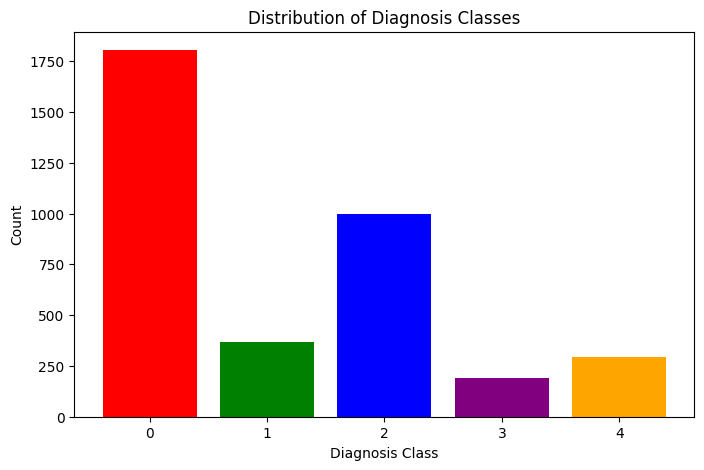

In [ ]:
labels = list(class_count.keys())
counts = list(class_count.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['red', 'blue', 'green', 'orange', 'purple'])


plt.xlabel("Diagnosis Class")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis Classes")
plt.xticks(labels)  


plt.show()